# Natural Language Processing (NLP) - Classificação de Sentimentos

In [1]:
# Apaga todas as variáveis
%reset

In [ ]:
# Pacotes necessários (tirar o comentário para instalar)
# !pip install pandas
# !pip install matplotlib
# !pip install sklearn
# !pip install nltk
# !pip install lime
# !pip install seaborn
# !pip install matplotlib_venn

## Bibliotecas

In [1]:
# Bibliotecas básicas
import os
import sys
import string
from unicodedata import normalize
import time
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
# Processamento dos Dados
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample
from sklearn.decomposition import TruncatedSVD

In [3]:
# Exploração do dados
from sklearn import metrics
from sklearn.datasets import make_classification
from nltk import ngrams, FreqDist
from matplotlib_venn import venn2 
##TODO: importar wordcloud

In [4]:
# Modelagem / Machine Learning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

**********

## Preparando o ambiente

In [5]:
# O puknt dataset é necessários para realizar a tarefa de tokenização
nltk.download('punkt') 
# Instala a lista de stopwords
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/rflmorais/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rflmorais/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Define a pasta onde está o arquivo my_fuctions.py
sys.path.insert(0, './lib')
# exibir a plotagem diretamente abaixo da célula de código que o produziu
%matplotlib inline
# define o estilo a ser aplicado nas plotagens
sns.set_style('darkgrid')

In [7]:
# Pasta do projeto
folder_path = '../13_TCC/'
# Lista de datasets do projeto
print(f'Arquivos utilizados no projeto: \n{os.listdir(folder_path + "assets/")}\n')

Arquivos utilizados no projeto: 
['.DS_Store', 'fig', 'lgr_model.pkl', 'corpus_2021-01-07.csv', 'b2w-reviews01.csv', 'olist_order_reviews_dataset.csv']



## Funções Próprias

Funções criadas para serem utilizadas nas tarefas de processamento, análise exploratória, criação e avaliação dos modelos.

In [8]:
# Importa as funções do arquivo my_functions.py
import my_ml_functions as ml_tools

Módulo importado com sucesso em 19-01-2021 às 10:41:43


***************

## Carregando o arquivo do Corpus

Antes de iniciar os procedimentos para a criação do modelo, vamos carregar o arquivo `corpus.csv`. Este arquivo contém o conjunto de dados já limpo e processado. Os procedimentos de normalização e processamento do dataset bruto foram realizados no arquivo `01_Coleta_e_Processamento.ipynb`

In [10]:
data = pd.read_csv(folder_path + 'assets/corpus_2021-01-07.csv')
#data.dropna(axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155026 entries, 0 to 155025
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   processed_review  155026 non-null  object
 1   score             155026 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


## Criação e Avaliação dos Modelos de Machine Learning - Classificação de Sentimentos

Serão criados 3 diferentes tipos de modelo para a análise de sentimentos do problema proposto:

* **Multinomial Naive Bayes (BernoullinNB)**
* **Logistic Regression (LR)**
* **Support Vector Machince (LinearSVC)**

Uma vez que o conjunto de dados está distorcido (desbalanceado), ou seja, tem mais previsões positivas do que negativas. Será utilizado  como  métrica de avaliação a Media-F ponderada. Além disso, será gerada a a Matriz de confusão para entender como está o desempenho do modelo em ambos os tipos de classificação (positivas e negativas).

## Train Test Split

Para construir um sistema de aprendizado de máquina, precisamos construir nossos modelos nos dados de treinamento e, em seguida, testar e avaliar seu desempenho nos dados de teste.
Durante o treinamento o modelo não deve "ver" os dados de teste A ideia reservar um conjunto de dados verdadeiramente "exógeno" (nunca usado durante o treinamento) para testar o desempenho do seu modelo no final. Se o conjunto de teste é usado durante o treinamento, as informações podem vazar (data leakage) do conjunto de teste para o modelo, e não será mais possível demonstrar a a capacidade de generalização do modelo (porque as informações do conjunto de teste vazaram para o modelo).

Portanto, neste momente temos uma datase que contem o corpus (conjundo de docuemntos) limpo e processado e os labels de cada documentos, classificando-os em positivo (1) ou negativo (0). O modelo irá extrair as informações, características do corpus que permita entender porque ele pertence àquela determinada classe. Para sabermos como o modelo está se saindo, é preciso ter um dado de teste. Este dado, não pode ter sido usado na fase em que estava treinando, pois senata fase o modelo "olhava" as caracteristicas do corpus e o seu label. Assim, dividimos o dados em em 4 partes.
 

In [11]:
# Seleciona a coluna com as features 
X = data['processed_review']
# Seleciona a coluna com os labels
y = data['score']

In [12]:
# Divide os dados em dados de treino e dados de teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% dados de treinamento
    stratify=y,     # matem a distribuição de classes conforme no corpus 
    random_state=42 # reproducibilidade
)

### Cross-validation

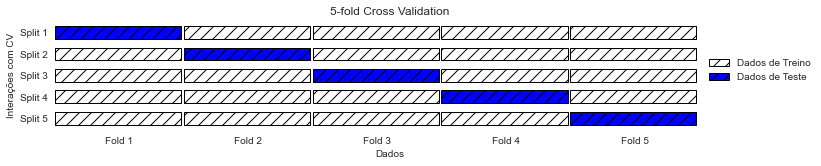

In [13]:
# Ilustração de um 5-fold cross-validation
ml_tools.plot_cross_validation()

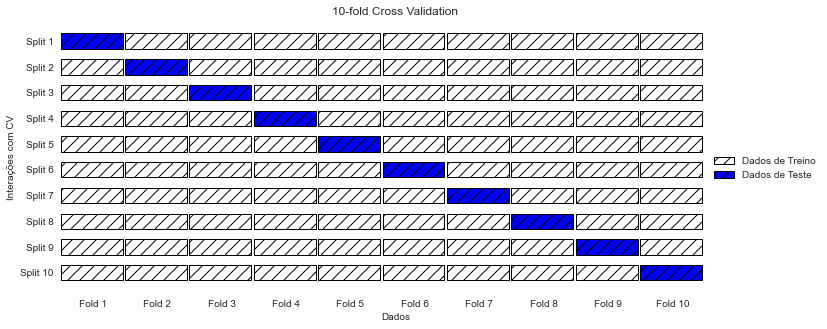

In [14]:
# Ilustração de um 5-fold cross-validation
ml_tools.plot_cross_validation(k=10)

## Confusion Matrix

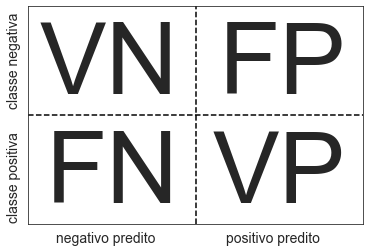

In [15]:
ml_tools.plot_binary_confusion_matrix()

## Curva ROC

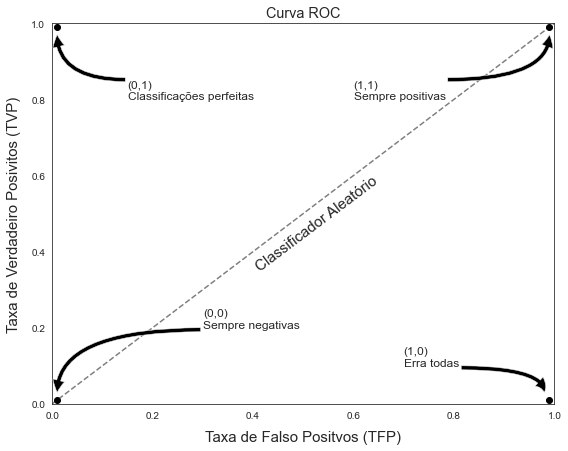

In [16]:
# Apresenta o Gráfico da cruva ROC
fig, ax = plt.subplots(figsize=(9,7))
plt.style.use('ggplot')
ax.annotate('(0,1)\nClassificações perfeitas', xy=(0.01, 0.97), xytext=(0.15, 0.8),
            arrowprops=dict(facecolor='black', connectionstyle="angle3,angleA=0,angleB=-90"), size=12)
ax.annotate('(1,0)\nErra todas', xy=(0.98, 0.03), xytext=(0.7, 0.1),
            arrowprops=dict(facecolor='black', connectionstyle="angle3,angleA=0,angleB=-90"), size=12)
ax.annotate('(1,1)\nSempre positivas', xy=(0.99, 0.97), xytext=(0.6, 0.8),
            arrowprops=dict(facecolor='black', connectionstyle="angle3,angleA=0,angleB=-90"), size=12)
ax.annotate('(0,0)\nSempre negativas', xy=(0.01, 0.03), xytext=(0.3, 0.2),
            arrowprops=dict(facecolor='black', connectionstyle="angle3,angleA=0,angleB=-90"), size=12)
ax.annotate('Classificador Aleatório', xy=(0.40, 0.35), size=15, rotation=37)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.plot(0.01,0.99, marker='o', c='black')
plt.plot(0.99,0.01, marker='o', c='black')
plt.plot(0.99,0.99, marker='o', c='black')
plt.plot(0.01,0.01, marker='o', c='black')
plt.xlim([0.0, 1.])
plt.ylim([0.0, 1.])
plt.xlabel('Taxa de Falso Positvos (TFP)', size=15, labelpad=10)
plt.ylabel('Taxa de Verdadeiro Posivitos (TVP)', size=15, labelpad=10)
plt.title('Curva ROC')
plt.show()

## Extraindo as features do corpus

min_df=

Apesar de termos feito a remoção de palavras insignificantes com as stopwords, esta é uma lista exaustiva e não contempla todas as possibilidade. O parâmetro min_df, ao construir o vocabulário, ignora os termos que têm uma frequência de documento estritamente inferior ao limite fornecido. Este valor também é denominado cut-off na literatura. Desta forma, serão ignoradas aquelas palavras que aparecem em poucos documentos. Assim, ao definirmos min_df=3, serão ignoradas as palavras que aparecem em menos de 3 documentos.

### CountVectorizer: Abordagem TF (Term-Frequency)

In [17]:
# Cria um objeto da classe CountVectorizer
tf = CountVectorizer(min_df=3)
# aprende sobre os dados de treino e tranforma em features
tf_train_features = tf.fit_transform(X_train)

# transforma os dados de teste em features
tf_test_features = tf.transform(X_test)

print(f'Formato da Matriz de Features de Treino: {tf_train_features.shape}')
print(f'Formato da Matriz de Features de Teste {tf_test_features.shape}')

Formato da Matriz de Features de Treino: (124020, 16700)
Formato da Matriz de Features de Teste (31006, 16700)


### TfidfVectorizer: Abordagem TF-IDF (Term Frequency-Inverse Document Frequency)

In [18]:
# Cria um objeto da classe TfidfVectorizer
tfidf = TfidfVectorizer(min_df=3)
# aprende sobre os dados de treino e tranforma em features
tfidf_train_features = tfidf.fit_transform(X_train)

# transforma os dados de teste em features
tfidf_test_features = tfidf.transform(X_test)

print(f'Formato da Matriz de Features de Treino: {tfidf_train_features.shape}')
print(f'Formato da Matriz de Features de Teste {tfidf_test_features.shape}')

Formato da Matriz de Features de Treino: (124020, 16700)
Formato da Matriz de Features de Teste (31006, 16700)


## Construindo os Classificadores sobre as Features

Vamos usar dus funçòes para facilitar o trabalho. Cada uma delas vai treinar o modelo com 5-folds e avaliar sua performance nos dados de treino e de teste. A métrica escolhida foi a medida-F ponderada (F1-Score Weighted). A medida-F ponderada calcula as métricas para cada rótulo e encontra sua média ponderada por suporte (o número de instâncias verdadeiras para cada rótulo). Isso altera o parâmetro "macro" (calcula as métricas para cada rótulo e encontra sua média não ponderada) para compensar o desequilíbrio do rótulo; pode resultar em uma medida-F que não está entre a precisão e a recuperação.

### Naive Bayes Classifier - MultinomialNB

In [19]:
# Cria o objeto MultinomialNB
clf_mnb = MultinomialNB()
# Treina o modelo e avalia com a abordage TF
mnb_tf = ml_tools.train_get_metrics(
    approach='TF',
    classifier=clf_mnb,
    train_features=tf_train_features,
    test_features=tf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Treina o modelo e avalia com a abordagem TF-IDF
mnb_tfidf = ml_tools.train_get_metrics(
    approach='TF-IDF',
    classifier=clf_mnb,
    train_features=tfidf_train_features,
    test_features=tfidf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Junta os dois resultadso em um único DataFrame
mnb_performance = ml_tools.tf_tfidf_dataframe_metrics(mnb_tf, mnb_tfidf)

Desempenho do Modelo:


,0
modelo,MultinomialNB
Medida-F de Treino (TF),0.9393
Medida-F de Teste (TF),0.9409
Tempo Total(TF),6.953
Medida-F de Treino (TF-IDF),0.9344
Medida-F de Teste (TF-IDF),0.9337
Tempo Total(TF-IDF),0.662


### Logistic Regression

In [20]:
# Cria o objeto LogisticRegression
clf_lgr = LogisticRegression()
# Treina o modelo e avalia com a abordage TF
lgr_tf = ml_tools.train_get_metrics(
    approach='TF',
    classifier=clf_lgr,
    train_features=tf_train_features,
    test_features=tf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Treina o modelo e avalia com a abordagem TF-IDF
lgr_tfidf = ml_tools.train_get_metrics(
    approach='TF-IDF',
    classifier=clf_lgr,
    train_features=tfidf_train_features,
    test_features=tfidf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Junta os dois resultadso em um único DataFrame
lgr_performance = ml_tools.tf_tfidf_dataframe_metrics(lgr_tf, lgr_tfidf)

Desempenho do Modelo:


,0
modelo,LogisticRegression
Medida-F de Treino (TF),0.9517
Medida-F de Teste (TF),0.9517
Tempo Total(TF),12.822
Medida-F de Treino (TF-IDF),0.9549
Medida-F de Teste (TF-IDF),0.9560
Tempo Total(TF-IDF),6.436


### Support Vector Machines

In [21]:
# Cria o objeto SVM
clf_svm = LinearSVC()
# Treina o modelo e avalia com a abordage TF
svm_tf = ml_tools.train_get_metrics(
    approach='TF',
    classifier=clf_svm,
    train_features=tf_train_features,
    test_features=tf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Treina o modelo e avalia com a abordagem TF-IDF
svm_tfidf = ml_tools.train_get_metrics(
    approach='TF-IDF',
    classifier=clf_svm,
    train_features=tfidf_train_features,
    test_features=tfidf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Junta os dois resultadso em um único DataFrame
svm_performance = ml_tools.tf_tfidf_dataframe_metrics(svm_tf, svm_tfidf)

Desempenho do Modelo:


,0
modelo,LinearSVC
Medida-F de Treino (TF),0.9423
Medida-F de Teste (TF),0.9422
Tempo Total(TF),38.061
Medida-F de Treino (TF-IDF),0.9514
Medida-F de Teste (TF-IDF),0.9523
Tempo Total(TF-IDF),3.18


### Random Forest

In [22]:
# Cria o objetio Random Forest
clf_rfc = RandomForestClassifier(n_estimators=10, random_state=42)
# Treina o modelo e avalia com a abordage TF
rfc_tf = ml_tools.train_get_metrics(
    approach='TF',
    classifier=clf_rfc,
    train_features=tf_train_features,
    test_features=tf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Treina o modelo e avalia com a abordagem TF-IDF
rfc_tfidf = ml_tools.train_get_metrics(
    approach='TF-IDF',
    classifier=clf_rfc,
    train_features=tfidf_train_features,
    test_features=tfidf_test_features,
    train_labels=y_train,
    test_labels=y_test
)
# Junta os dois resultadso em um único DataFrame
rfc_performance = ml_tools.tf_tfidf_dataframe_metrics(rfc_tf, rfc_tfidf)

Desempenho do Modelo:


,0
modelo,RandomForestClassifier
Medida-F de Treino (TF),0.9377
Medida-F de Teste (TF),0.9403
Tempo Total(TF),94.384
Medida-F de Treino (TF-IDF),0.9370
Medida-F de Teste (TF-IDF),0.9423
Tempo Total(TF-IDF),79.411


### Pandas DataFrame comparativo

Tabeal comparativa de todos os modelos testados para cada abordagem

In [23]:
# Concatena todos os resultados em um único DataFrame
clfs_performance = pd.concat([
    mnb_performance,
    lgr_performance,
    svm_performance,
    rfc_performance
]).reset_index(drop=True).T

In [24]:
ml_tools.make_latex(clfs_performance, 'clfs_performance', index=True)
# clfs_performance.style.background_gradient(cmap='Blues').to_excel('clfs_performance.xlsx')

In [25]:
clfs_performance

,0,1,2,3
modelo,MultinomialNB,LogisticRegression,LinearSVC,RandomForestClassifier
Medida-F de Treino (TF),0.9393,0.9517,0.9423,0.9377
Medida-F de Teste (TF),0.9409,0.9517,0.9422,0.9403
Tempo Total(TF),6.953,12.822,38.061,94.384
Medida-F de Treino (TF-IDF),0.9344,0.9549,0.9514,0.9370
Medida-F de Teste (TF-IDF),0.9337,0.9560,0.9523,0.9423
Tempo Total(TF-IDF),0.662,6.436,3.18,79.411


## Model Tuning

### Encontrando a Melhor Configuração de intervalo de ngrams usando o Grid Search

Apesar de a análise exploratória dos dados indicar que haverá uma melhora na predição com o uso de bigrams, será utilizado agora a função GridSearchCV para fazer uma varredura numa lista de parâmetros passados, para encontar qual seria o melhor combinação de parâmetros para o modelo.

O método score do GridSearchCV retorna a métrica definida no método scoring. No nosso caso foi utilizada a medida-F ponderada

### Naive Bayes Classifier - MultinomialNB

In [26]:
# Cria o Pipeline para o MultinomialNB
mnb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=3)),
    ('mnb', MultinomialNB())
])
# Dicionários de parâmetros a ser testado em busca do melhor resultado
mnb_param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [10000, 15000, None],
    'mnb__alpha': [1e-5, 1e-3, 1e-1, 1]
}

In [27]:
# aplica o pipeline sobre os dados de treino
mnb_gs = ml_tools.grid_search_cv(
    pipe=mnb_pipeline,
    param_grid=mnb_param_grid,
    train_features=X_train,
    train_labels=y_train
)

Modelo: MultinomialNB
Tempo gasto: 7 minutos.
Melhor nota do cross-validation: 94.86%
Melhor parâmetro: {'mnb__alpha': 1, 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}


In [28]:
# Desepenho do modelo ajustado sobre os dados de teste
mnb_gs_test_score = mnb_gs.score(X_test, y_test)
print(f'Melhor Medida-F de Teste {mnb_gs_test_score:.2%}')

Melhor Medida-F de Teste 94.97%


### Logistic Regression

In [29]:
# Cria o pipeline para a regressão logistica
lgr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=3)),
    ('lgr', LogisticRegression(random_state=42))
])
lgr_param_grid = {
    # parâmetros para extração das features
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [10000, 15000, None],
    # inverso da força de regularização (linspace: números uniformemente espaçados em um intervalo especificado.)
    'lgr__C': np.linspace(0.1, 5, 5),
    # especifica a norma usada na penalização para regularizar
    'lgr__penalty': ['l1', 'l2'], 
    # usa os valores de y para ajustar automaticamente os pesos inversamente proporcionais às frequências da classe
    'lgr__class_weight': ['balanced', None],
}

In [30]:
# aplica o pipeline sobre os dados de treino
lgr_gs = ml_tools.grid_search_cv(
    pipe=lgr_pipeline,
    param_grid=lgr_param_grid,
    train_features=X_train,
    train_labels=y_train
)

Modelo: LogisticRegression
Tempo gasto: 46 minutos.
Melhor nota do cross-validation: 96.14%
Melhor parâmetro: {'lgr__C': 3.7750000000000004, 'lgr__class_weight': None, 'lgr__penalty': 'l2', 'tfidf__max_features': None, 'tfidf__ngram_range': (1, 2)}


In [31]:
# Desepenho do modelo ajustado sobre os dados de teste
lgr_gs_test_score = lgr_gs.score(X_test, y_test)
print(f'Melhor Medida-F de Teste {lgr_gs_test_score:.2%}')

Melhor Medida-F de Teste 96.19%


### Linear Support Vector Machine

In [32]:
# Cria o pipeline para o LinearSVC
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(min_df=3)),
    ('svm', LinearSVC(random_state=42))
])
svm_param_grid = {
    # parâmetros para extração das features
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__max_features': [10000, 15000, None],
    # inverso da força de regularização (linspace: números uniformemente espaçados em um intervalo especificado.)
    'svm__C': np.linspace(0.1, 5, 5),
    # especifica a norma usada na penalização para regularizar
    'svm__penalty': ['l1', 'l2'], 
    # usa os valores de y para ajustar automaticamente os pesos inversamente proporcionais às frequências da classe
    'svm__class_weight': ['balanced', None]
}

In [33]:
svm_gs = ml_tools.grid_search_cv(
    pipe=svm_pipeline,
    param_grid=svm_param_grid,
    train_features=X_train,
    train_labels=y_train
)

Modelo: LinearSVC
Tempo gasto: 41 minutos.
Melhor nota do cross-validation: 96.06%
Melhor parâmetro: {'svm__C': 0.1, 'svm__class_weight': None, 'svm__penalty': 'l2', 'tfidf__max_features': 15000, 'tfidf__ngram_range': (1, 2)}


In [34]:
# Desepenho do modelo ajustado sobre os dados de teste
svm_gs_test_score = svm_gs.score(X_test, y_test)
print(f'Melhor Medida-F de Teste {svm_gs_test_score:.2%}')

Melhor Medida-F de Teste 96.16%


### DataFrame Com todas Métricas Pós-Tuning

In [35]:
gs_performance = pd.DataFrame(index=['Medida-F de Treino (TF-IDF)',
                                    'Medida-F de Teste (TF-IDF)', 'Tempo Gasto'])
gs_performance['MultinomialNB'] = [mnb_gs.best_score_, mnb_gs_test_score, '3 minutos']
gs_performance['LogisticRegression'] = [lgr_gs.best_score_, lgr_gs_test_score, '18 minutos']
gs_performance['LinearSVC(SVM)'] = [svm_gs.best_score_, svm_gs_test_score, '29 minutos']

In [36]:
gs_performance
#ml_tools.make_latex(gs_performance, 'gs_performance', index=True)

,MultinomialNB,LogisticRegression,LinearSVC(SVM)
Medida-F de Treino (TF-IDF),0.948642,0.961385,0.960613
Medida-F de Teste (TF-IDF),0.949685,0.961894,0.961625
Tempo Gasto,3 minutos,18 minutos,29 minutos


### ROC AUC

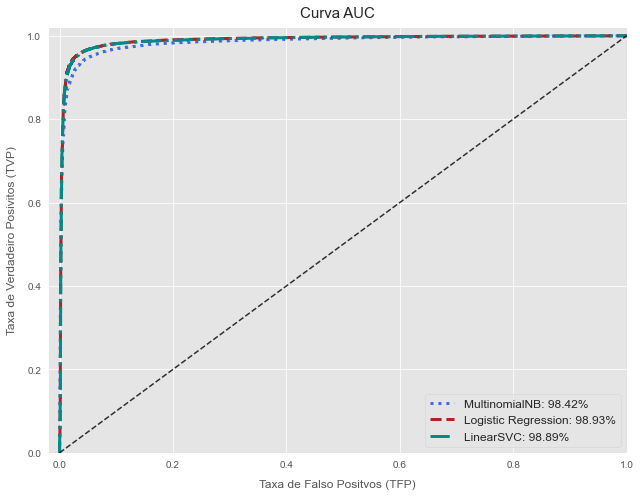

In [37]:
# Cria um dicionario de probabilidade para cada modelo
pred_probas_dict = {
    'MultinomialNB': mnb_gs.predict_proba(X_test)[::,1],
    'Logistic Regression': lgr_gs.predict_proba(X_test)[::,1],
    'LinearSVC': svm_gs.decision_function(X_test)
}
# Cria o gráfico com a área sob a curva ROC (AUC)
ml_tools.plot_auc_from_dict(
    pred_proba_labels=pred_probas_dict,
    true_labels=y_test,
    figsize=(9,7)
)

### Matriz de Confusão

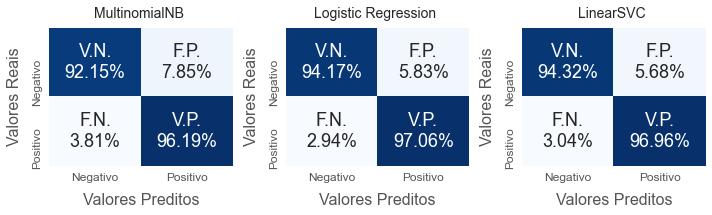

In [38]:
# Cria um dicionário de predições para cad modelo
pred_dict = {
    'MultinomialNB': mnb_gs.predict(X_test),
    'Logistic Regression': lgr_gs.predict(X_test),
    'LinearSVC': svm_gs.predict(X_test)
}

ml_tools.custom_cf_matrix_from_dict(
    predicted_labels=pred_dict,
    true_labels=y_test,
    savefig=True
)

# Salva o Modelo no disco
Isso nos permite implantar e usar o modelo no futuro, sem ter que treiná-lo novamente cada vez que quisermos usá-lo.
Este código manterá nosso modelo no disco como um arquivo denominado lr_model.pkl. Portanto, sempre que carregarmos esse objeto na memória novamente, obteremos o objeto do modelo de regressão logística.

In [39]:
# # Persite o modelo treinado e ajustado na memória
# joblib.dump(lgr_gs, folder_path + f'assets/lgr_model.pkl')

**********

In [41]:
ml_tools.success_message(3)